In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv('/content/BMW_Car_Sales_Classification.csv')
dataset.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
dataset['Model'].unique()

array(['5 Series', 'i8', 'X3', '7 Series', 'M5', '3 Series', 'X1', 'M3',
       'X5', 'i3', 'X6'], dtype=object)

In [5]:
dataset.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [8]:
dataset['Model'] = le.fit_transform(dataset['Model'])

In [9]:
dataset['Region'] = le.fit_transform(dataset['Region'])

In [10]:
dataset['Color'] = le.fit_transform(dataset['Color'])

In [11]:
dataset['Fuel_Type'] = le.fit_transform(dataset['Fuel_Type'])

In [12]:
dataset['Transmission'] = le.fit_transform(dataset['Transmission'])

In [13]:
dataset['Sales_Classification'] = le.fit_transform(dataset['Sales_Classification'])

In [14]:
dataset.head(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1


In [15]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [16]:
x

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,1,2016,1,3,3,1,3.5,151748,98740,8300
1,10,2013,4,3,2,0,1.6,121671,79219,3428
2,1,2022,4,1,3,0,4.5,10991,113265,6994
3,6,2024,3,1,3,0,1.7,27255,60971,4047
4,2,2020,5,0,0,1,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,9,2014,1,3,2,1,4.6,151030,42932,8182
49996,9,2023,3,4,1,1,4.2,147396,48714,9816
49997,1,2010,3,3,3,0,4.5,174939,46126,8280
49998,9,2020,1,5,1,0,3.8,3379,58566,9486


In [17]:
y

,Sales_Classification
0,0
1,1
2,1
3,1
4,1
...,...
49995,0
49996,0
49997,0
49998,0


In [18]:
dataset['Model'].describe()

,Model
count,50000.000000
mean,4.995240
std,3.175736
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


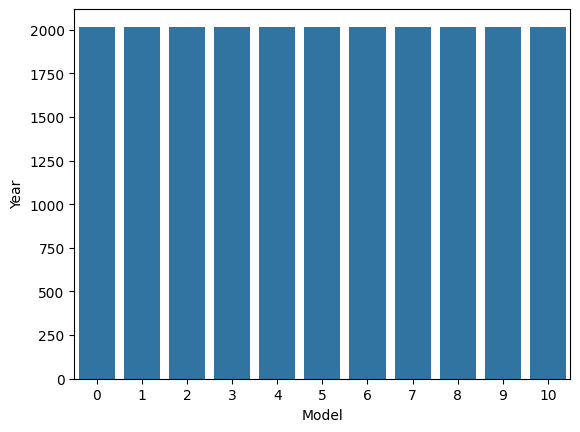

In [19]:
sns.barplot(x='Model', y='Year', data=dataset)
plt.show()

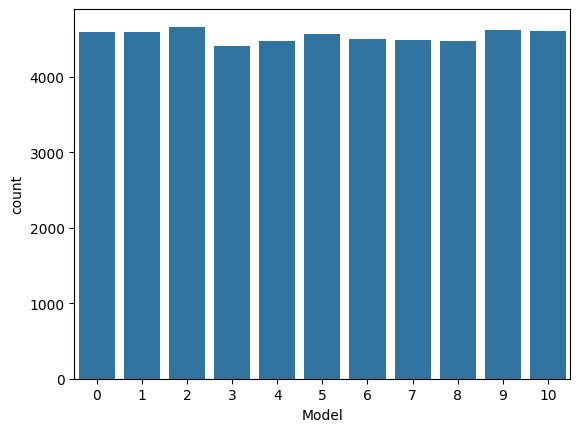

In [20]:
sns.countplot(x='Model', data=dataset)
plt.show()

/tmp/ipython-input-21-421310439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Year'])


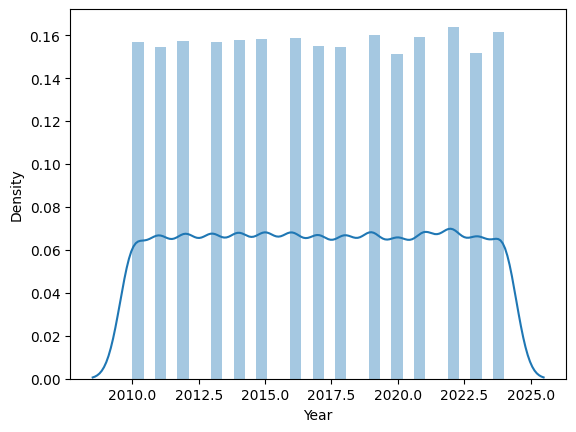

In [21]:
sns.distplot(dataset['Year'])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [24]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [25]:
x_train

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,0.944329,0.224835,0.295844,-0.295328,0.439625,0.994416,-1.431900,-0.409216,1.294942,0.785754
1,0.629765,1.382378,1.469772,-0.295328,-1.354946,-1.005616,0.151171,-0.109110,1.212959,0.357225
2,-0.313927,-1.627233,0.295844,0.877599,-1.354946,0.994416,1.041648,1.140116,-0.276711,-0.560400
3,0.944329,-0.238182,0.295844,1.464062,1.336910,-1.005616,-0.343539,0.745582,-0.923808,-1.548047
4,0.629765,0.456344,-0.878083,-0.881792,-0.457660,-1.005616,0.744822,-0.379034,-0.401860,1.525526
...,...,...,...,...,...,...,...,...,...,...
39995,0.629765,-1.395724,-1.465047,-0.295328,-0.457660,-1.005616,0.843764,-1.609278,-0.777422,1.029777
39996,-0.313927,-0.238182,1.469772,-1.468256,1.336910,0.994416,-1.332958,0.866964,-1.717021,-0.592960
39997,0.944329,0.456344,-0.878083,0.291135,-0.457660,-1.005616,0.052229,0.728136,1.728790,-0.172134
39998,0.944329,0.224835,0.882808,-0.295328,-1.354946,-1.005616,0.744822,0.178278,1.247160,-0.001983


In [26]:
x_test

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,-1.257618,1.613886,0.295844,-0.295328,-1.354946,0.994416,0.843764,0.332740,-0.643194,-0.341235
1,0.000637,1.382378,-1.465047,-1.468256,1.336910,0.994416,0.447997,0.915541,0.282324,-0.300972
2,-1.572182,1.382378,-0.878083,-0.295328,-1.354946,0.994416,-0.838248,-0.711531,0.368347,-0.546046
3,1.573456,0.687852,-1.465047,1.464062,0.439625,-1.005616,-0.937190,-0.436567,-0.136211,-0.812826
4,0.000637,-0.238182,-0.878083,0.291135,0.439625,-1.005616,-0.145655,1.528557,-1.030721,-1.305774
...,...,...,...,...,...,...,...,...,...,...
9995,0.944329,-0.469690,0.882808,-0.295328,0.439625,-1.005616,1.635300,-1.141370,0.495497,-0.288719
9996,0.944329,0.456344,0.295844,-1.468256,0.439625,-1.005616,-0.145655,1.372801,1.325951,0.066638
9997,0.944329,1.613886,0.295844,-0.881792,-1.354946,0.994416,-0.343539,1.421757,1.505306,-0.105614
9998,0.315201,0.456344,1.469772,0.877599,-0.457660,-1.005616,-0.739306,1.442568,-0.924769,1.120805


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [29]:
lg.score(x_train, y_train)*100,lg.score(x_test, y_test)*100

(99.94, 99.92999999999999)

In [30]:
y_pred_lg = lg.predict(x_test)

In [31]:
y_pred_lg

array([1, 1, 1, ..., 1, 0, 1])

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
dt.score(x_train, y_train)*100,dt.score(x_test, y_test)*100

(100.0, 100.0)

In [34]:
y_pred = dt.predict(x_test)

In [35]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [36]:
rg = RandomForestClassifier(n_estimators=5)
rg.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [37]:
rg.score(x_train, y_train)*100,rg.score(x_test, y_test)*100

(100.0, 100.0)

In [38]:
y_pred_rg = rg.predict(x_test)
y_pred_rg

array([1, 1, 1, ..., 1, 0, 1])

In [39]:
accuracy_score = accuracy_score(y_test, y_pred_rg)
accuracy_score

1.0

In [40]:
cr = classification_report(y_test, y_pred_rg)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3032
           1       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [41]:
cf = confusion_matrix(y_test, y_pred_rg)
cf

array([[3032,    0],
       [   0, 6968]])

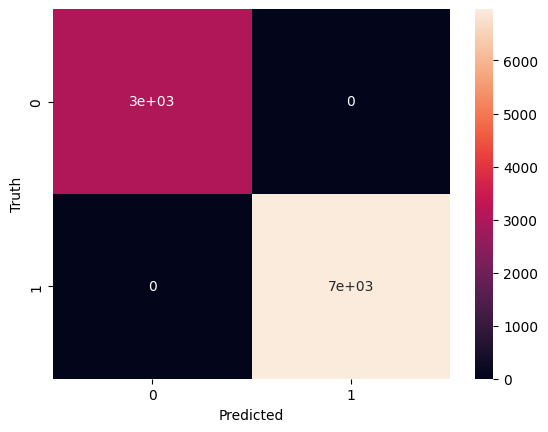

In [42]:
sns.heatmap(cf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [52]:
dataset_original = pd.read_csv('/content/BMW_Car_Sales_Classification.csv')

label_encoders = {}
for column in dataset_original.select_dtypes(include='object').columns:
    if column != 'Sales_Classification':
        le = LabelEncoder()
        dataset_original[column] = le.fit_transform(dataset_original[column])
        label_encoders[column] = le

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
new_data = pd.DataFrame([{
    "Model": "X5",
    "Year": 2023,
    "Region": "North America",
    "Color": "Black",
    "Fuel_Type": "Diesel",
    "Transmission": "Automatic",
    "Engine_Size_L": 3.0,
    "Mileage_KM": 25000,
    "Price_USD": 55000,
    "Sales_Volume": 120
}])

for column in new_data.select_dtypes(include='object').columns:
    le = label_encoders[column]
    new_data[column] = le.transform(new_data[column])

new_data = new_data[x_train.columns]

new_data_scaled = scaler.transform(new_data)

display(new_data_scaled)

array([[ 7.00000000e+00,  2.02300000e+03,  4.00000000e+00,
         6.30606678e-17, -5.44453371e-17,  4.19220214e-17,
         3.00000000e+00,  2.50000000e+04,  5.50000000e+04,
         1.20000000e+02]])

In [59]:
# Convert the scaled numpy array back to a pandas DataFrame with the correct column names
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=x_train.columns)

# Make prediction using the trained RandomForestClassifier model (rg)
predicted_class = rg.predict(new_data_scaled_df)

# Interpret prediction by converting numerical prediction back to original class label
# We need to re-fit a LabelEncoder for Sales_Classification to inverse transform
le_sales = LabelEncoder()
le_sales.fit(pd.read_csv('/content/BMW_Car_Sales_Classification.csv')['Sales_Classification'])
predicted_class_label = le_sales.inverse_transform(predicted_class)

# Display the predicted class label
print(f"Predicted Sales Classification: {predicted_class_label[0]}")

Predicted Sales Classification: High


In [58]:
pd.DataFrame(predicted_class_label, columns=['Predicted_Sales_Classification'])

,Predicted_Sales_Classification
0,High
